In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This is the final notebook of the project. In this notebook previously created relevant data tables are merged - migration statistics, migration path clusters (together with some overall features) and average annual land temperature data. Correlations between the temperature rise and the start of the migration day are looked at for both summer and winter migrations. 

Analysis is done for both the high quality data and medium quality data to see if this brings any noticeable change to the final results.

### High quality data

Merging the data tables

In [2]:
hq_migration_data = pd.read_csv('data/hq_ind_overview.csv')
hq_migration_features = pd.read_csv('data/hq_trail_features.csv')
hq_temperature_data = pd.read_csv('data/annual_avg_temp.csv')

In [3]:
hq_migration_data = hq_migration_data.set_index('Unnamed: 0', drop = True)
hq_migration_data.index.name = None

In [4]:
year_column = [int(ind.split("_")[1]) for ind in hq_migration_data.id_year]
ind_column = [ind.split("_")[0] for ind in hq_migration_data.id_year]

hq_migration_data['year'] = year_column
hq_migration_data['ind'] = ind_column

In [5]:
hq_migration_data

,id_year,S_total_period,W_total_period,first_S,last_S,first_W,last_W,shortest_S_window,shortest_W_window,S_windows,W_windows,S_before_W,year,ind
3,14542E_2001,27.0,15.0,96.0,132.0,242.0,288.0,35.0,45.0,1,1,1,2001,14542E
15,14551E_1997,81.0,62.0,80.0,140.0,228.0,357.0,60.0,15.0,1,2,1,1997,14551E
16,14551E_1998,65.0,26.0,56.0,116.0,243.0,263.0,59.0,20.0,1,1,1,1998,14551E
18,14551E_2000,50.0,37.0,66.0,108.0,231.0,267.0,41.0,35.0,1,1,1,2000,14551E
22,14552E_1999,70.0,78.0,49.0,166.0,233.0,365.0,53.0,23.0,2,2,1,1999,14552E
28,14554G_2004,24.0,27.0,68.0,85.0,249.0,273.0,16.0,24.0,1,1,1,2004,14554G
41,16896A_2002,38.0,78.0,61.0,101.0,227.0,286.0,39.0,58.0,1,1,1,2002,16896A
42,16896A_2003,54.0,55.0,58.0,109.0,225.0,270.0,50.0,44.0,1,1,1,2003,16896A
43,16896A_2004,83.0,16.0,37.0,130.0,203.0,244.0,92.0,40.0,1,1,1,2004,16896A
46,16896A_2007,38.0,29.0,66.0,115.0,221.0,262.0,48.0,40.0,1,1,1,2007,16896A


In [6]:
hq_migration_features = hq_migration_features.rename(columns={'Unnamed: 0': 'id_year'})
hq_migration_features = hq_migration_features.set_index(hq_migration_data.index)

hq_migration_features

,id_year,total_distance,min_lat,max_lat,min_lon,max_lon,cluster
3,14542E_2001,6686.617965,33.84300,48.05300,-5.90400,9.22700,2
15,14551E_1997,19684.465966,-1.64700,54.45300,17.83600,39.97000,0
16,14551E_1998,15937.566116,2.14000,54.60700,16.67700,37.97500,0
18,14551E_2000,13866.382648,9.87100,54.30900,20.96100,38.18000,0
22,14552E_1999,21315.985493,-24.39900,51.76500,16.37400,37.57100,3
28,14554G_2004,11827.075586,10.47600,33.34000,16.19800,36.18400,1
41,16896A_2002,16983.359503,11.50100,53.11100,11.87500,39.72600,0
42,16896A_2003,18326.084385,7.11100,53.38800,11.96600,40.86700,0
43,16896A_2004,19751.298699,2.63000,52.98700,11.56100,41.93100,0
46,16896A_2007,15615.294059,9.39000,52.89900,11.89000,35.88400,0


In [7]:
hq_data = hq_migration_data.merge(hq_migration_features, how = 'left', on = 'id_year')

hq_data = hq_data.merge(hq_temperature_data, how = 'left', on = 'year')
hq_data = hq_data.drop(columns = 'Unnamed: 0')

hq_data = hq_data.set_index(hq_migration_data.index)

In [8]:
hq_data

,id_year,S_total_period,W_total_period,first_S,last_S,first_W,last_W,shortest_S_window,shortest_W_window,S_windows,...,S_before_W,year,ind,total_distance,min_lat,max_lat,min_lon,max_lon,cluster,annual_anomaly
3,14542E_2001,27.0,15.0,96.0,132.0,242.0,288.0,35.0,45.0,1,...,1,2001,14542E,6686.617965,33.84300,48.05300,-5.90400,9.22700,2,0.819583
15,14551E_1997,81.0,62.0,80.0,140.0,228.0,357.0,60.0,15.0,1,...,1,1997,14551E,19684.465966,-1.64700,54.45300,17.83600,39.97000,0,0.631333
16,14551E_1998,65.0,26.0,56.0,116.0,243.0,263.0,59.0,20.0,1,...,1,1998,14551E,15937.566116,2.14000,54.60700,16.67700,37.97500,0,0.898250
18,14551E_2000,50.0,37.0,66.0,108.0,231.0,267.0,41.0,35.0,1,...,1,2000,14551E,13866.382648,9.87100,54.30900,20.96100,38.18000,0,0.642583
22,14552E_1999,70.0,78.0,49.0,166.0,233.0,365.0,53.0,23.0,2,...,1,1999,14552E,21315.985493,-24.39900,51.76500,16.37400,37.57100,3,0.675917
28,14554G_2004,24.0,27.0,68.0,85.0,249.0,273.0,16.0,24.0,1,...,1,2004,14554G,11827.075586,10.47600,33.34000,16.19800,36.18400,1,0.768250
41,16896A_2002,38.0,78.0,61.0,101.0,227.0,286.0,39.0,58.0,1,...,1,2002,16896A,16983.359503,11.50100,53.11100,11.87500,39.72600,0,0.949333
42,16896A_2003,54.0,55.0,58.0,109.0,225.0,270.0,50.0,44.0,1,...,1,2003,16896A,18326.084385,7.11100,53.38800,11.96600,40.86700,0,0.877750
43,16896A_2004,83.0,16.0,37.0,130.0,203.0,244.0,92.0,40.0,1,...,1,2004,16896A,19751.298699,2.63000,52.98700,11.56100,41.93100,0,0.768250
46,16896A_2007,38.0,29.0,66.0,115.0,221.0,262.0,48.0,40.0,1,...,1,2007,16896A,15615.294059,9.39000,52.89900,11.89000,35.88400,0,1.051667


### Correlation analysis

Besides the simple correlation calculation, a simple linear regression line is fitted for the sake of visualisations.

#### Beginning of migration vs. Year

In [9]:
coefficients_S = np.polyfit(hq_data['year'], hq_data['first_S'], 1) #Summer migrations
coefficients_W = np.polyfit(hq_data['year'], hq_data['first_W'], 1) #Winter migrations

#Create a polynomial function with coefficients
polynomial_S = np.poly1d(coefficients_S)
polynomial_W = np.poly1d(coefficients_W)

#Generate x-values (years) for the line plot
years_line = np.linspace(min(hq_data['year']), max(hq_data['year']), 100)

#Generate y-values (fitted values) for each x-value
fitted_values_S = polynomial_S(years_line)
fitted_values_W = polynomial_W(years_line)

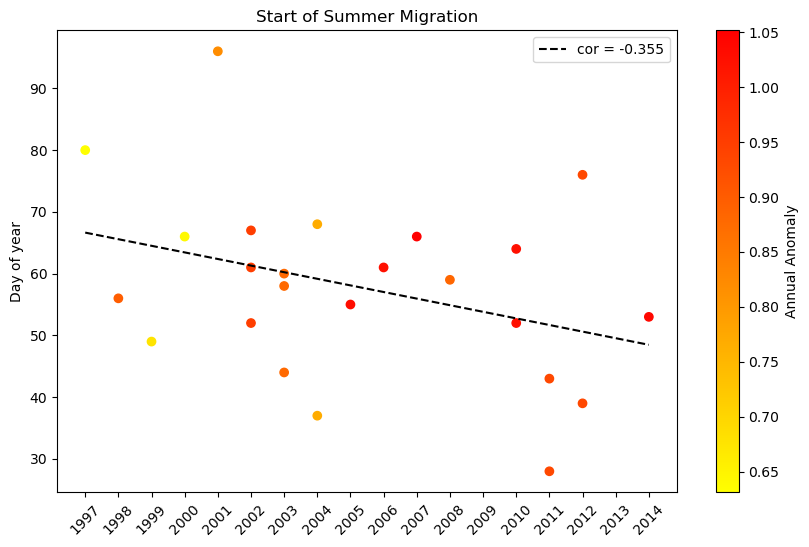

In [10]:
plt.figure(figsize=(10, 6))

sc = plt.scatter(hq_data['year'], hq_data['first_S'], c = hq_data['annual_anomaly'], cmap = 'autumn_r')
plt.plot(years_line, fitted_values_S, color = 'k', linestyle = '--', label = f"cor = {np.corrcoef(hq_data['year'], hq_data['first_S'])[0,1]:.3f}")

plt.xticks(range(min(hq_data['year']), max(hq_data['year']) + 1), rotation = 45)

cbar = plt.colorbar(sc)
cbar.set_label('Annual Anomaly')

plt.title('Start of Summer Migration')
plt.ylabel('Day of year')
plt.legend()

plt.show()

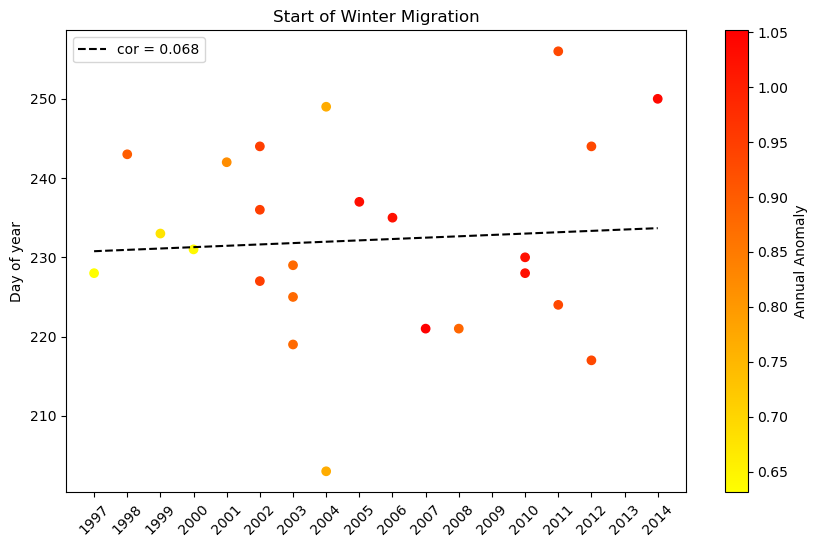

In [11]:
plt.figure(figsize=(10, 6))

sc = plt.scatter(hq_data['year'], hq_data['first_W'], c = hq_data['annual_anomaly'], cmap = 'autumn_r')
plt.plot(years_line, fitted_values_W, color = 'k', linestyle = '--', label = f"cor = {np.corrcoef(hq_data['year'], hq_data['first_W'])[0,1]:.3f}")

plt.xticks(range(min(hq_data['year']), max(hq_data['year']) + 1), rotation = 45)

cbar = plt.colorbar(sc)
cbar.set_label('Annual Anomaly')

plt.title('Start of Winter Migration')
plt.ylabel('Day of year')
plt.legend()

plt.show()

#### Beginning of migration vs. Temperature anomaly

In [12]:
coefficients_S_t = np.polyfit(hq_data['first_S'], hq_data['annual_anomaly'], 1)
coefficients_W_t = np.polyfit(hq_data['first_W'], hq_data['annual_anomaly'], 1)

polynomial_S_t = np.poly1d(coefficients_S_t)
polynomial_W_t = np.poly1d(coefficients_W_t)

years_line_S = np.linspace(min(hq_data['first_S']), max(hq_data['first_S']), 100)
years_line_W = np.linspace(min(hq_data['first_W']), max(hq_data['first_W']), 100)

fitted_values_S_t = polynomial_S_t(years_line_S)
fitted_values_W_t = polynomial_W_t(years_line_W)

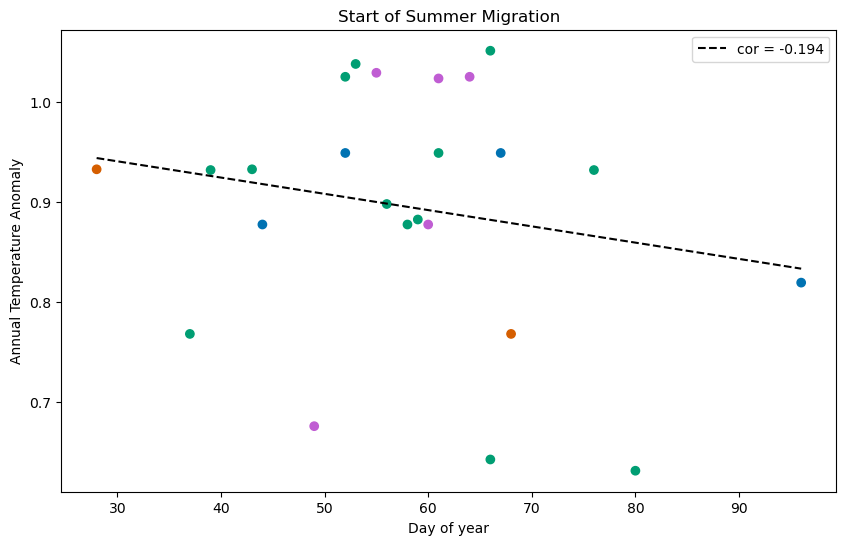

In [13]:
plt.figure(figsize=(10, 6))

colors = ['#009E73', '#D55E00', '#0072B2', '#C05DD3']

#Map the cluster labels to colors
unique_labels = hq_data['cluster'].unique()
unique_labels.sort()

color_map = {label: colors[i] for i, label in enumerate(unique_labels)}
scatter_colors = hq_data['cluster'].map(color_map)

plt.scatter(hq_data['first_S'], hq_data['annual_anomaly'], c = scatter_colors)
plt.plot(years_line_S, fitted_values_S_t, color = 'k', linestyle = '--', label = f"cor = {np.corrcoef(hq_data['first_S'], hq_data['annual_anomaly'])[0,1]:.3f}")

plt.title('Start of Summer Migration')
plt.xlabel('Day of year')
plt.ylabel('Annual Temperature Anomaly')
plt.legend()

plt.show()

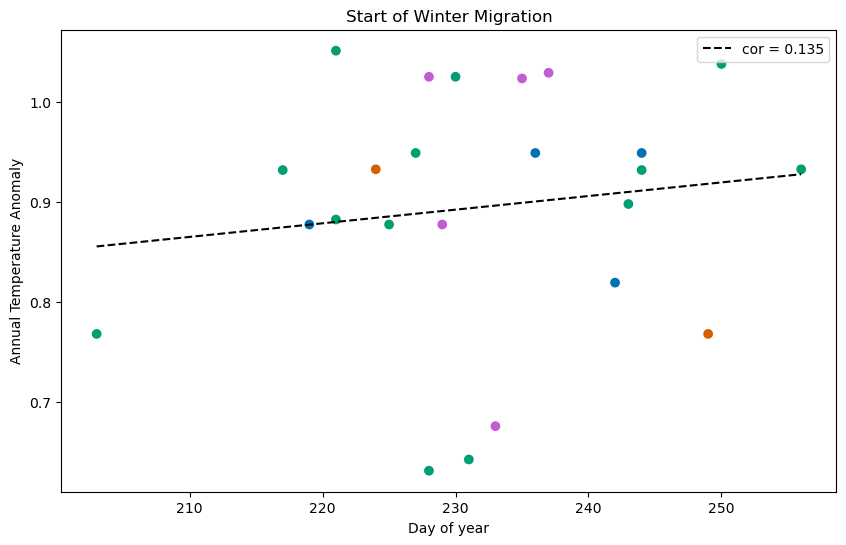

In [14]:
plt.figure(figsize=(10, 6))

plt.scatter(hq_data['first_W'], hq_data['annual_anomaly'], c = scatter_colors)
plt.plot(years_line_W, fitted_values_W_t, color = 'k', linestyle = '--', label = f"cor = {np.corrcoef(hq_data['first_W'], hq_data['annual_anomaly'])[0,1]:.3f}")

plt.title('Start of Winter Migration')
plt.xlabel('Day of year')
plt.ylabel('Annual Temperature Anomaly')
plt.legend()

plt.show()

### Medium quality data

Merging the data tables

In [15]:
mq_migration_data = pd.read_csv('data/mq_ind_overview.csv')
mq_migration_features = pd.read_csv('data/mq_trail_features.csv')
mq_temperature_data = pd.read_csv('data/annual_avg_temp.csv')

In [16]:
mq_migration_data = mq_migration_data.set_index('Unnamed: 0', drop = True)
mq_migration_data.index.name = None

In [17]:
year_column = [int(ind.split("_")[1]) for ind in mq_migration_data.id_year]
ind_column = [ind.split("_")[0] for ind in mq_migration_data.id_year]

mq_migration_data['year'] = year_column
mq_migration_data['ind'] = ind_column

In [18]:
mq_migration_data

,id_year,S_total_period,W_total_period,first_S,last_S,first_W,last_W,shortest_S_window,shortest_W_window,S_windows,W_windows,S_before_W,year,ind
3,14542E_2001,27.0,15.0,96.0,132.0,242.0,288.0,35.0,45.0,1,1,1,2001,14542E
5,14542E_2003,16.0,0.0,55.0,90.0,-1.0,-1.0,35.0,-1.0,1,0,1,2003,14542E
15,14551E_1997,81.0,62.0,80.0,140.0,228.0,357.0,60.0,15.0,1,2,1,1997,14551E
16,14551E_1998,65.0,26.0,56.0,116.0,243.0,263.0,59.0,20.0,1,1,1,1998,14551E
18,14551E_2000,50.0,37.0,66.0,108.0,231.0,267.0,41.0,35.0,1,1,1,2000,14551E
20,14552D_1997,66.0,0.0,62.0,115.0,-1.0,-1.0,52.0,-1.0,1,0,1,1997,14552D
22,14552E_1999,70.0,78.0,49.0,166.0,233.0,365.0,53.0,23.0,2,2,1,1999,14552E
28,14554G_2004,24.0,27.0,68.0,85.0,249.0,273.0,16.0,24.0,1,1,1,2004,14554G
30,14555E_1995,42.0,0.0,61.0,95.0,-1.0,-1.0,33.0,-1.0,1,0,1,1995,14555E
33,14555G_1999,104.0,0.0,48.0,326.0,-1.0,-1.0,277.0,-1.0,1,0,1,1999,14555G


In [19]:
mq_migration_features = mq_migration_features.rename(columns={'Unnamed: 0': 'id_year'})
mq_migration_features = mq_migration_features.set_index(mq_migration_data.index)

mq_migration_features

,id_year,total_distance,min_lat,max_lat,min_lon,max_lon,cluster
3,14542E_2001,6686.617965,33.84300,48.05300,-5.90400,9.22700,0
5,14542E_2003,3267.526596,34.05100,48.07200,-5.83100,9.48400,0
15,14551E_1997,19684.465966,-1.64700,54.45300,17.83600,39.97000,1
16,14551E_1998,15937.566116,2.14000,54.60700,16.67700,37.97500,1
18,14551E_2000,13866.382648,9.87100,54.30900,20.96100,38.18000,1
20,14552D_1997,10564.570477,-20.77700,40.42100,22.69600,36.63500,1
22,14552E_1999,21315.985493,-24.39900,51.76500,16.37400,37.57100,1
28,14554G_2004,11827.075586,10.47600,33.34000,16.19800,36.18400,1
30,14555E_1995,4844.246033,11.12200,30.55000,16.41900,33.20500,1
33,14555G_1999,14305.036288,-23.38600,38.67700,15.84100,35.78400,1


In [20]:
mq_data = mq_migration_data.merge(mq_migration_features, how = 'left', on = 'id_year')

mq_data = mq_data.merge(mq_temperature_data, how = 'left', on = 'year')
mq_data = mq_data.drop(columns = 'Unnamed: 0')

mq_data = mq_data.set_index(mq_migration_data.index)

In [21]:
mq_data

,id_year,S_total_period,W_total_period,first_S,last_S,first_W,last_W,shortest_S_window,shortest_W_window,S_windows,...,S_before_W,year,ind,total_distance,min_lat,max_lat,min_lon,max_lon,cluster,annual_anomaly
3,14542E_2001,27.0,15.0,96.0,132.0,242.0,288.0,35.0,45.0,1,...,1,2001,14542E,6686.617965,33.84300,48.05300,-5.90400,9.22700,0,0.819583
5,14542E_2003,16.0,0.0,55.0,90.0,-1.0,-1.0,35.0,-1.0,1,...,1,2003,14542E,3267.526596,34.05100,48.07200,-5.83100,9.48400,0,0.877750
15,14551E_1997,81.0,62.0,80.0,140.0,228.0,357.0,60.0,15.0,1,...,1,1997,14551E,19684.465966,-1.64700,54.45300,17.83600,39.97000,1,0.631333
16,14551E_1998,65.0,26.0,56.0,116.0,243.0,263.0,59.0,20.0,1,...,1,1998,14551E,15937.566116,2.14000,54.60700,16.67700,37.97500,1,0.898250
18,14551E_2000,50.0,37.0,66.0,108.0,231.0,267.0,41.0,35.0,1,...,1,2000,14551E,13866.382648,9.87100,54.30900,20.96100,38.18000,1,0.642583
20,14552D_1997,66.0,0.0,62.0,115.0,-1.0,-1.0,52.0,-1.0,1,...,1,1997,14552D,10564.570477,-20.77700,40.42100,22.69600,36.63500,1,0.631333
22,14552E_1999,70.0,78.0,49.0,166.0,233.0,365.0,53.0,23.0,2,...,1,1999,14552E,21315.985493,-24.39900,51.76500,16.37400,37.57100,1,0.675917
28,14554G_2004,24.0,27.0,68.0,85.0,249.0,273.0,16.0,24.0,1,...,1,2004,14554G,11827.075586,10.47600,33.34000,16.19800,36.18400,1,0.768250
30,14555E_1995,42.0,0.0,61.0,95.0,-1.0,-1.0,33.0,-1.0,1,...,1,1995,14555E,4844.246033,11.12200,30.55000,16.41900,33.20500,1,0.669833
33,14555G_1999,104.0,0.0,48.0,326.0,-1.0,-1.0,277.0,-1.0,1,...,1,1999,14555G,14305.036288,-23.38600,38.67700,15.84100,35.78400,1,0.675917


Some individuals are missing winter migration data. Replacing those values with NA.

In [22]:
mq_data['first_W'] = mq_data['first_W'].replace(-1, np.nan)
mq_data['last_W'] = mq_data['last_W'].replace(-1, np.nan)
mq_data['shortest_W_window'] = mq_data['shortest_W_window'].replace(-1, np.nan)

### Correlation analysis

In [32]:
mq_data_no_NA = mq_data.dropna() #Identical to HQ data

#### Beginning of migration vs. Year

In [24]:
coefficients_S = np.polyfit(mq_data['year'], mq_data['first_S'], 1)
coefficients_W = np.polyfit(mq_data_no_NA['year'], mq_data_no_NA['first_W'], 1)

polynomial_S = np.poly1d(coefficients_S)
polynomial_W = np.poly1d(coefficients_W)

years_line = np.linspace(min(mq_data['year']), max(mq_data['year']), 100)

fitted_values_S = polynomial_S(years_line)
fitted_values_W = polynomial_W(years_line)

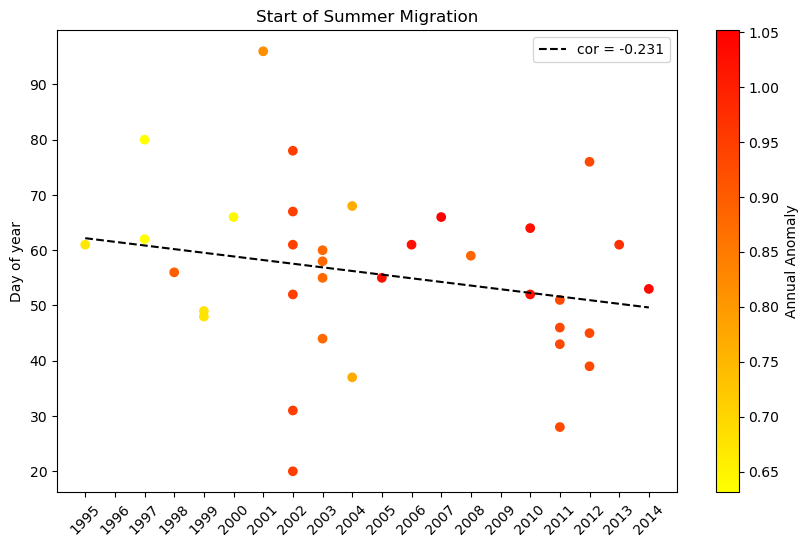

In [25]:
plt.figure(figsize=(10, 6))

sc = plt.scatter(mq_data['year'], mq_data['first_S'], c = mq_data['annual_anomaly'], cmap = 'autumn_r')
plt.plot(years_line, fitted_values_S, color = 'k', linestyle = '--', label = f"cor = {np.corrcoef(mq_data['year'], mq_data['first_S'])[0,1]:.3f}")

plt.xticks(range(min(mq_data['year']), max(mq_data['year']) + 1), rotation = 45)

cbar = plt.colorbar(sc)
cbar.set_label('Annual Anomaly')

plt.title('Start of Summer Migration')
plt.ylabel('Day of year')
plt.legend()

plt.show()

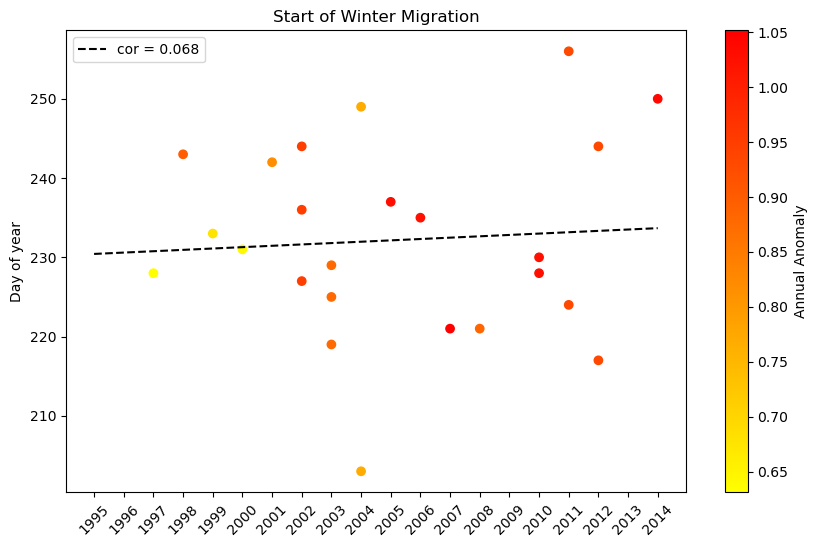

In [26]:
plt.figure(figsize=(10, 6))

sc = plt.scatter(mq_data_no_NA['year'], mq_data_no_NA['first_W'], c = mq_data_no_NA['annual_anomaly'], cmap = 'autumn_r')
plt.plot(years_line, fitted_values_W, color = 'k', linestyle = '--', label = f"cor = {np.corrcoef(mq_data_no_NA['year'], mq_data_no_NA['first_W'])[0,1]:.3f}")

plt.xticks(range(min(mq_data['year']), max(mq_data['year']) + 1), rotation = 45)

cbar = plt.colorbar(sc)
cbar.set_label('Annual Anomaly')

plt.title('Start of Winter Migration')
plt.ylabel('Day of year')
plt.legend()

plt.show()

#### Beginning of migration vs. Temperature anomaly

In [27]:
coefficients_S_t = np.polyfit(mq_data['first_S'], mq_data['annual_anomaly'], 1)
coefficients_W_t = np.polyfit(mq_data_no_NA['first_W'], mq_data_no_NA['annual_anomaly'], 1)

#Create a polynomial function with these coefficients
polynomial_S_t = np.poly1d(coefficients_S_t)
polynomial_W_t = np.poly1d(coefficients_W_t)

#Generate x-values (years) for the line plot (same range as your scatter plot)
years_line_S = np.linspace(min(mq_data['first_S']), max(mq_data['first_S']), 100)
years_line_W = np.linspace(min(mq_data_no_NA['first_W']), max(mq_data_no_NA['first_W']), 100)

#Generate y-values (fitted values) for each x-value
fitted_values_S_t = polynomial_S_t(years_line_S)
fitted_values_W_t = polynomial_W_t(years_line_W)

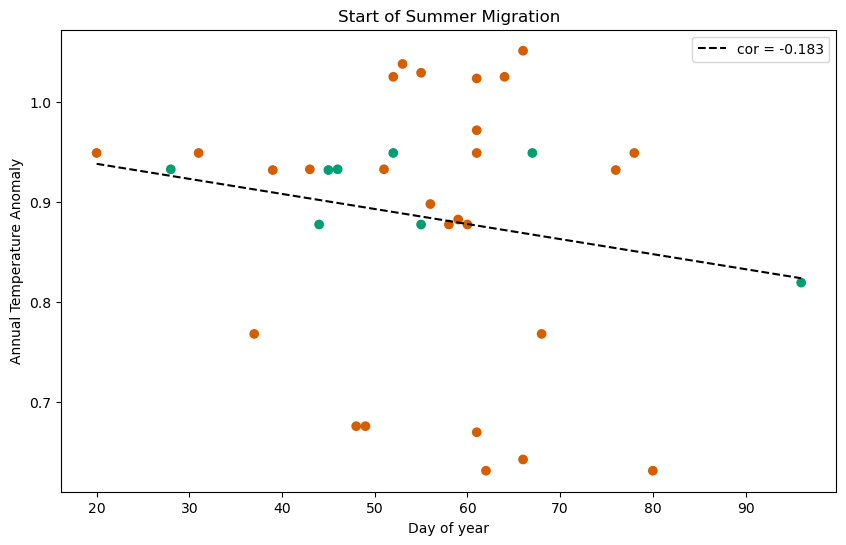

In [28]:
plt.figure(figsize=(10, 6))

colors = ['#009E73', '#D55E00', '#0072B2', '#C05DD3']

#Map the cluster labels to colors
unique_labels = mq_data['cluster'].unique()
unique_labels.sort()

color_map = {label: colors[i] for i, label in enumerate(unique_labels)}
scatter_colors = mq_data['cluster'].map(color_map)

plt.scatter(mq_data['first_S'], mq_data['annual_anomaly'], c = scatter_colors)
plt.plot(years_line_S, fitted_values_S_t, color = 'k', linestyle = '--', label = f"cor = {np.corrcoef(mq_data['first_S'], mq_data['annual_anomaly'])[0,1]:.3f}")

plt.title('Start of Summer Migration')
plt.xlabel('Day of year')
plt.ylabel('Annual Temperature Anomaly')
plt.legend()

plt.show()

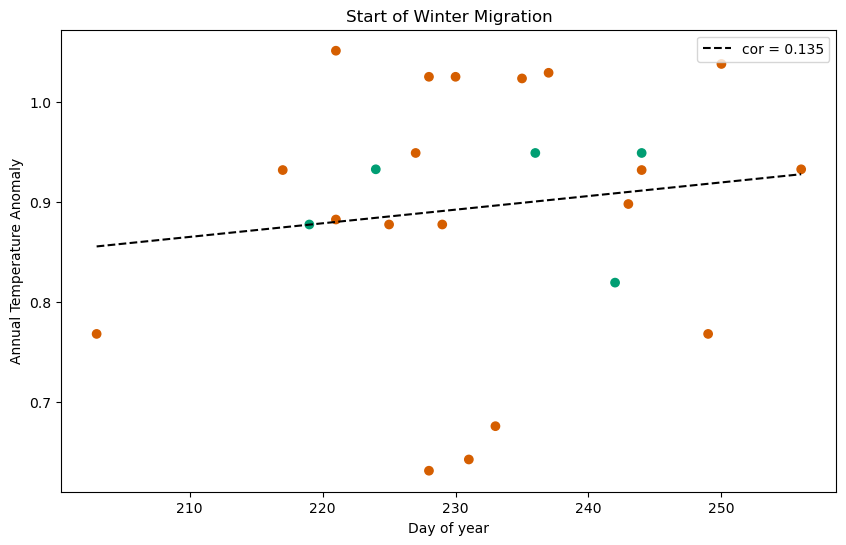

In [29]:
plt.figure(figsize=(10, 6))

colors = ['#009E73', '#D55E00', '#0072B2', '#C05DD3']

#Map the cluster labels to colors
unique_labels = mq_data_no_NA['cluster'].unique()
unique_labels.sort()

color_map = {label: colors[i] for i, label in enumerate(unique_labels)}
scatter_colors = mq_data_no_NA['cluster'].map(color_map)

plt.scatter(mq_data_no_NA['first_W'], mq_data_no_NA['annual_anomaly'], c = scatter_colors)
plt.plot(years_line_W, fitted_values_W_t, color = 'k', linestyle = '--', label = f"cor = {np.corrcoef(mq_data_no_NA['first_W'], mq_data_no_NA['annual_anomaly'])[0,1]:.3f}")

plt.title('Start of Winter Migration')
plt.xlabel('Day of year')
plt.ylabel('Annual Temperature Anomaly')
plt.legend()

plt.show()

### Conclusion

From the series of notebooks and corresponding analysis we can unfortunately only assume that the climate warming processes also affect white stork migration behaviour. 

We can see a weak negative correlation between the start of summer migration and average temperature anomaly (HQ = -0.194, MQ = -0.183) and a weak positive correlation between the start of winter migration and average temperature anomaly (0.135). Average negative correlation can be seen between the year value and the start of summer migration (HQ = -0.355, MQ = -0.231) but no correlation can be seen between the year value and the start of winter migration.

These observations allow us to assume that year by year the white storks tend to start their summer migration earlier while on the other hand the effects on winter migration starting time are not as noticeable. This means increase in average reproduction period length and decrease in the lengths of wintering periods. Effects of this sort of ongoing processes can be various and without having in depth knowledge about white stork life cycle phenology it is hard to tell if this could be beneficial or detrimental for the species in the long run.

The **main problem** with the analysis is the lack of high quality data points. Although correlations can be looked upon they do not guarantee causation, for which some statistical tests should be carried out. Unfortunately the limited dataset does not fill the assumptions of simpler models, while also hiding multiple layers of dependancy within itself. Data points from the same year, from the same individual and from the same cluster violate the rules of independancy and add complexity to the analysis. Although mixed effect models could be used in these sorts of cases, considering the previous three layers of additional dependancy results in really small test groups (1-3 individuals) which means the results of this sort of analysis are just not reliable. Interpreting any possible differences between different migration path clusters is also really complicated because the clusters are just too small.

The analysis could potentially be improved in multiple aspects. The seemingly easiest solution would be increasing the number og high quality individuals, which actually is probably the hardest solution to achieve. Assuming that increasing the GPS data size is not within our power, the solution would be to extract more quality data out of the already existing data points. The main focus point should be the migration labelling algorithm which at the moment is rather simplistic and thus also rather limiting. One other alternative approach to try is to use geographically more accurate temperature data like country-based averages for example instead of global averages. If both of those aspects could be further improved then the analysis could yield much better and more reliable results.

![alt text](https://flightforsurvival.org/wp-content/uploads/2020/09/White-Stork-cDave-Walker_Birdlife-Cyprus_August-2020-scaled.jpg)

Nonetheless, long live the white storks!